In [9]:
import tensorflow as tf

In [15]:
random_flot = tf.random.uniform(shape=())
random_flot

<tf.Tensor: shape=(), dtype=float32, numpy=0.18933642>

In [18]:
zero_vector = tf.zeros(shape=(2))
zero_vector.numpy()

array([0., 0.], dtype=float32)

In [32]:
A = tf.constant([[1.],[3.]])
B = tf.constant([[5.,6.],[7.,8.]])
A

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [3.]], dtype=float32)>

In [17]:
print(A.shape)
print(A.dtype)
print(A.numpy())  #转换成Numpy

(2, 2)
<dtype: 'float32'>
[[1. 2.]
 [3. 4.]]


In [21]:
C = tf.add(A,B)
D = tf.matmul(A,B)
C,D

(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[ 6.,  8.],
        [10., 12.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[19., 22.],
        [43., 50.]], dtype=float32)>)

In [23]:
x = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:           #构建运算图?  赋值给TAPE了
    y = tf.square(x)                         #定义运算过程
y_grad = tape.gradient(y,x)
print(y,y_grad)

tf.Tensor(9.0, shape=(), dtype=float32) tf.Tensor(6.0, shape=(), dtype=float32)


In [29]:
X = tf.constant([[1.,2.],[3.,4.]])
y = tf.constant([[1.],[2.]])
W = tf.Variable(initial_value=[[1.],[2.]])
b = tf.Variable(initial_value=1.)
with tf.GradientTape() as tape:
    L = tf.reduce_sum(tf.square(tf.matmul(X,W) + b - y))
W_grad,b_grad = tape.gradient(L,[W,b])
print(L,W_grad,b_grad)

tf.Tensor(125.0, shape=(), dtype=float32) tf.Tensor(
[[ 70.]
 [100.]], shape=(2, 1), dtype=float32) tf.Tensor(30.0, shape=(), dtype=float32)


In [3]:
import numpy as np

In [6]:
X_raw = np.array([2013,2014,2015,2016,2017],dtype = np.float32)
y_raw = np.array([120000,14000,15000,16500,17500],dtype = np.float32)
X_raw


array([2013., 2014., 2015., 2016., 2017.], dtype=float32)

In [7]:
X = (X_raw - X_raw.min())/(X_raw.max()-X_raw.min())
y = (y_raw - y_raw.min())/(y_raw.max()-y_raw.min())

In [13]:
X = tf.constant(X)
y = tf.constant(y)
a = tf.Variable(initial_value=0.)
b = tf.Variable(initial_value=0.)
variables = [a,b]

num_epoch = 10000
optimizer = tf.keras.optimizers.SGD(learning_rate=5e-4)
for e in range(num_epoch):  #实际时这里每次取一部分样本集
    with tf.GradientTape() as tape:
        y_pred = a*X + b
        loss = tf.reduce_sum(tf.square(y_pred - y))
    grads = tape.gradient(loss,variables)
    optimizer.apply_gradients(grads_and_vars=zip(grads,variables))

In [17]:
#模型建立与训练

In [18]:
class MNISTLoader():
    def __init__(self):
        mnist = tf.keras.datasets.mnist
        (self.train_data, self.train_label), (self.test_data, self.test_label) = mnist.load_data()
        # MNIST中的图像默认为uint8（0-255的数字）。以下代码将其归一化到0-1之间的浮点数，并在最后增加一维作为颜色通道
        self.train_data = np.expand_dims(self.train_data.astype(np.float32) / 255.0, axis=-1)      # [60000, 28, 28, 1] 在最后面添加1维
        self.test_data = np.expand_dims(self.test_data.astype(np.float32) / 255.0, axis=-1)        # [10000, 28, 28, 1]
        self.train_label = self.train_label.astype(np.int32)    # [60000]
        self.test_label = self.test_label.astype(np.int32)      # [10000]
        self.num_train_data, self.num_test_data = self.train_data.shape[0], self.test_data.shape[0]

    def get_batch(self, batch_size):
        # 从数据集中随机取出batch_size个元素并返回
        index = np.random.randint(0, self.num_train_data, batch_size)
        return self.train_data[index, :], self.train_label[index]

In [19]:
class MLP(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()  #将后面展开  28*28?
        self.dense1 = tf.keras.layers.Dense(units=100,activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(units=10)
        
    def call(self,inputs):
        x = self.flatten(inputs)
        x = self.dense1(x)
        x = self.dense2(x)
        output = tf.nn.softmax(x)
        return output
        

In [20]:
num_epochs = 5
batch_size = 50
learning_rate = 0.001

In [21]:
model = MLP()


In [22]:
data_loader = MNISTLoader()
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

11493376/11490434 [==============================] - 4s 0us/step


In [25]:
num_batches = int(data_loader.num_train_data // batch_size * num_epochs)
for batch_index in range(num_batches):  #做几次
    X,y = data_loader.get_batch(batch_size)
    with tf.GradientTape() as tape:
        y_pred = model(X)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y_true=y,y_pred=y_pred)
        loss = tf.reduce_mean(loss)
        print("batch %d: loss %f" % (batch_index, loss.numpy()))
    grads = tape.gradient(loss,model.variables)
    optimizer.apply_gradients(grads_and_vars=zip(grads,model.variables))

batch 0: loss 2.471892
batch 1: loss 2.242958
batch 2: loss 2.148285
batch 3: loss 2.085737
batch 4: loss 2.097655
batch 5: loss 2.048501
batch 6: loss 1.862592
batch 7: loss 1.808074
batch 8: loss 1.825431
batch 9: loss 1.833134
batch 10: loss 1.624816
batch 11: loss 1.694798
batch 12: loss 1.651943
batch 13: loss 1.396600
batch 14: loss 1.449418
batch 15: loss 1.489480
batch 16: loss 1.404246
batch 17: loss 1.475331
batch 18: loss 1.269015
batch 19: loss 1.179361
batch 20: loss 1.209078
batch 21: loss 1.217193
batch 22: loss 1.164721
batch 23: loss 1.181256
batch 24: loss 1.047115
batch 25: loss 1.029919
batch 26: loss 1.063161
batch 27: loss 1.029940
batch 28: loss 0.905729
batch 29: loss 0.965996
batch 30: loss 0.867034
batch 31: loss 0.975118
batch 32: loss 1.042363
batch 33: loss 0.882886
batch 34: loss 0.934065
batch 35: loss 0.822445
batch 36: loss 0.821829
batch 37: loss 0.871712
batch 38: loss 0.722199
batch 39: loss 0.818385
batch 40: loss 0.782407
batch 41: loss 0.719406
ba

batch 361: loss 0.327294
batch 362: loss 0.288194
batch 363: loss 0.327183
batch 364: loss 0.187544
batch 365: loss 0.275301
batch 366: loss 0.151742
batch 367: loss 0.430631
batch 368: loss 0.249076
batch 369: loss 0.170019
batch 370: loss 0.224364
batch 371: loss 0.151913
batch 372: loss 0.313173
batch 373: loss 0.178042
batch 374: loss 0.177276
batch 375: loss 0.246046
batch 376: loss 0.104948
batch 377: loss 0.219161
batch 378: loss 0.173684
batch 379: loss 0.483696
batch 380: loss 0.405244
batch 381: loss 0.289200
batch 382: loss 0.410279
batch 383: loss 0.239315
batch 384: loss 0.148057
batch 385: loss 0.157469
batch 386: loss 0.096811
batch 387: loss 0.307887
batch 388: loss 0.249853
batch 389: loss 0.399329
batch 390: loss 0.645571
batch 391: loss 0.406188
batch 392: loss 0.301507
batch 393: loss 0.220515
batch 394: loss 0.348885
batch 395: loss 0.121610
batch 396: loss 0.429831
batch 397: loss 0.223993
batch 398: loss 0.170474
batch 399: loss 0.247652
batch 400: loss 0.334568


batch 732: loss 0.192326
batch 733: loss 0.156836
batch 734: loss 0.161084
batch 735: loss 0.092045
batch 736: loss 0.140111
batch 737: loss 0.428433
batch 738: loss 0.230832
batch 739: loss 0.111921
batch 740: loss 0.187967
batch 741: loss 0.146549
batch 742: loss 0.199012
batch 743: loss 0.206474
batch 744: loss 0.236134
batch 745: loss 0.099404
batch 746: loss 0.204246
batch 747: loss 0.125582
batch 748: loss 0.263084
batch 749: loss 0.158641
batch 750: loss 0.172598
batch 751: loss 0.174688
batch 752: loss 0.206601
batch 753: loss 0.179427
batch 754: loss 0.197752
batch 755: loss 0.152568
batch 756: loss 0.042441
batch 757: loss 0.108201
batch 758: loss 0.144631
batch 759: loss 0.168834
batch 760: loss 0.097900
batch 761: loss 0.066099
batch 762: loss 0.100885
batch 763: loss 0.131273
batch 764: loss 0.220321
batch 765: loss 0.243393
batch 766: loss 0.189043
batch 767: loss 0.104921
batch 768: loss 0.435234
batch 769: loss 0.197433
batch 770: loss 0.341496
batch 771: loss 0.323622


batch 1099: loss 0.196921
batch 1100: loss 0.111463
batch 1101: loss 0.232407
batch 1102: loss 0.130300
batch 1103: loss 0.096048
batch 1104: loss 0.281707
batch 1105: loss 0.095064
batch 1106: loss 0.119370
batch 1107: loss 0.216055
batch 1108: loss 0.132244
batch 1109: loss 0.059415
batch 1110: loss 0.182440
batch 1111: loss 0.300309
batch 1112: loss 0.119031
batch 1113: loss 0.299985
batch 1114: loss 0.067903
batch 1115: loss 0.277420
batch 1116: loss 0.177598
batch 1117: loss 0.132417
batch 1118: loss 0.182800
batch 1119: loss 0.122214
batch 1120: loss 0.172226
batch 1121: loss 0.059289
batch 1122: loss 0.166158
batch 1123: loss 0.220450
batch 1124: loss 0.166585
batch 1125: loss 0.082646
batch 1126: loss 0.150262
batch 1127: loss 0.323959
batch 1128: loss 0.100047
batch 1129: loss 0.137238
batch 1130: loss 0.064092
batch 1131: loss 0.091244
batch 1132: loss 0.194272
batch 1133: loss 0.097602
batch 1134: loss 0.136306
batch 1135: loss 0.039590
batch 1136: loss 0.239758
batch 1137: 

batch 1423: loss 0.129323
batch 1424: loss 0.085801
batch 1425: loss 0.186534
batch 1426: loss 0.139174
batch 1427: loss 0.063947
batch 1428: loss 0.145148
batch 1429: loss 0.026999
batch 1430: loss 0.076503
batch 1431: loss 0.112386
batch 1432: loss 0.124329
batch 1433: loss 0.083659
batch 1434: loss 0.150912
batch 1435: loss 0.057744
batch 1436: loss 0.104440
batch 1437: loss 0.326660
batch 1438: loss 0.133130
batch 1439: loss 0.171806
batch 1440: loss 0.076810
batch 1441: loss 0.080253
batch 1442: loss 0.178435
batch 1443: loss 0.122522
batch 1444: loss 0.085116
batch 1445: loss 0.184393
batch 1446: loss 0.133183
batch 1447: loss 0.108982
batch 1448: loss 0.070601
batch 1449: loss 0.225614
batch 1450: loss 0.176878
batch 1451: loss 0.083897
batch 1452: loss 0.120430
batch 1453: loss 0.140098
batch 1454: loss 0.109169
batch 1455: loss 0.125170
batch 1456: loss 0.415043
batch 1457: loss 0.084608
batch 1458: loss 0.098416
batch 1459: loss 0.094384
batch 1460: loss 0.127386
batch 1461: 

batch 1750: loss 0.172386
batch 1751: loss 0.125319
batch 1752: loss 0.084794
batch 1753: loss 0.059084
batch 1754: loss 0.178065
batch 1755: loss 0.063066
batch 1756: loss 0.163452
batch 1757: loss 0.039211
batch 1758: loss 0.090208
batch 1759: loss 0.116500
batch 1760: loss 0.102088
batch 1761: loss 0.106454
batch 1762: loss 0.135311
batch 1763: loss 0.118438
batch 1764: loss 0.103115
batch 1765: loss 0.164479
batch 1766: loss 0.085987
batch 1767: loss 0.049892
batch 1768: loss 0.157538
batch 1769: loss 0.132796
batch 1770: loss 0.056691
batch 1771: loss 0.129147
batch 1772: loss 0.056301
batch 1773: loss 0.157419
batch 1774: loss 0.379428
batch 1775: loss 0.096955
batch 1776: loss 0.046017
batch 1777: loss 0.127867
batch 1778: loss 0.061953
batch 1779: loss 0.217232
batch 1780: loss 0.095269
batch 1781: loss 0.105626
batch 1782: loss 0.230409
batch 1783: loss 0.095609
batch 1784: loss 0.099195
batch 1785: loss 0.113502
batch 1786: loss 0.123605
batch 1787: loss 0.189896
batch 1788: 

batch 2076: loss 0.113554
batch 2077: loss 0.279604
batch 2078: loss 0.035131
batch 2079: loss 0.258549
batch 2080: loss 0.148207
batch 2081: loss 0.379074
batch 2082: loss 0.058323
batch 2083: loss 0.050840
batch 2084: loss 0.109314
batch 2085: loss 0.050832
batch 2086: loss 0.048785
batch 2087: loss 0.181431
batch 2088: loss 0.075632
batch 2089: loss 0.115043
batch 2090: loss 0.074267
batch 2091: loss 0.045440
batch 2092: loss 0.109699
batch 2093: loss 0.077728
batch 2094: loss 0.143272
batch 2095: loss 0.126591
batch 2096: loss 0.162470
batch 2097: loss 0.074921
batch 2098: loss 0.077352
batch 2099: loss 0.138882
batch 2100: loss 0.044573
batch 2101: loss 0.052501
batch 2102: loss 0.048150
batch 2103: loss 0.040651
batch 2104: loss 0.031631
batch 2105: loss 0.150470
batch 2106: loss 0.082445
batch 2107: loss 0.051554
batch 2108: loss 0.051960
batch 2109: loss 0.046710
batch 2110: loss 0.067639
batch 2111: loss 0.231778
batch 2112: loss 0.101945
batch 2113: loss 0.060775
batch 2114: 

batch 2399: loss 0.125076
batch 2400: loss 0.050691
batch 2401: loss 0.123244
batch 2402: loss 0.033624
batch 2403: loss 0.208000
batch 2404: loss 0.087414
batch 2405: loss 0.122081
batch 2406: loss 0.025962
batch 2407: loss 0.123602
batch 2408: loss 0.082242
batch 2409: loss 0.256333
batch 2410: loss 0.274046
batch 2411: loss 0.145954
batch 2412: loss 0.066324
batch 2413: loss 0.122404
batch 2414: loss 0.131306
batch 2415: loss 0.056418
batch 2416: loss 0.309224
batch 2417: loss 0.034084
batch 2418: loss 0.189524
batch 2419: loss 0.088294
batch 2420: loss 0.116993
batch 2421: loss 0.115010
batch 2422: loss 0.120851
batch 2423: loss 0.105469
batch 2424: loss 0.173391
batch 2425: loss 0.060425
batch 2426: loss 0.038647
batch 2427: loss 0.118199
batch 2428: loss 0.157998
batch 2429: loss 0.065839
batch 2430: loss 0.138599
batch 2431: loss 0.199466
batch 2432: loss 0.127279
batch 2433: loss 0.110079
batch 2434: loss 0.072404
batch 2435: loss 0.060629
batch 2436: loss 0.058976
batch 2437: 

batch 2732: loss 0.139672
batch 2733: loss 0.051838
batch 2734: loss 0.031231
batch 2735: loss 0.137482
batch 2736: loss 0.367585
batch 2737: loss 0.117257
batch 2738: loss 0.178884
batch 2739: loss 0.059386
batch 2740: loss 0.033933
batch 2741: loss 0.241690
batch 2742: loss 0.069810
batch 2743: loss 0.101937
batch 2744: loss 0.064789
batch 2745: loss 0.245203
batch 2746: loss 0.193257
batch 2747: loss 0.052081
batch 2748: loss 0.013293
batch 2749: loss 0.225255
batch 2750: loss 0.017643
batch 2751: loss 0.039141
batch 2752: loss 0.037156
batch 2753: loss 0.042767
batch 2754: loss 0.106176
batch 2755: loss 0.052008
batch 2756: loss 0.097268
batch 2757: loss 0.106299
batch 2758: loss 0.065391
batch 2759: loss 0.165781
batch 2760: loss 0.078665
batch 2761: loss 0.081950
batch 2762: loss 0.275480
batch 2763: loss 0.169084
batch 2764: loss 0.082094
batch 2765: loss 0.155331
batch 2766: loss 0.124920
batch 2767: loss 0.057126
batch 2768: loss 0.082524
batch 2769: loss 0.075588
batch 2770: 

batch 3058: loss 0.148553
batch 3059: loss 0.035786
batch 3060: loss 0.064067
batch 3061: loss 0.043422
batch 3062: loss 0.097251
batch 3063: loss 0.071359
batch 3064: loss 0.157666
batch 3065: loss 0.060611
batch 3066: loss 0.164814
batch 3067: loss 0.014677
batch 3068: loss 0.191307
batch 3069: loss 0.217040
batch 3070: loss 0.315739
batch 3071: loss 0.088021
batch 3072: loss 0.109461
batch 3073: loss 0.111753
batch 3074: loss 0.164145
batch 3075: loss 0.041792
batch 3076: loss 0.132121
batch 3077: loss 0.054011
batch 3078: loss 0.026684
batch 3079: loss 0.043879
batch 3080: loss 0.094087
batch 3081: loss 0.068311
batch 3082: loss 0.079598
batch 3083: loss 0.102402
batch 3084: loss 0.159551
batch 3085: loss 0.060315
batch 3086: loss 0.068978
batch 3087: loss 0.057464
batch 3088: loss 0.163012
batch 3089: loss 0.100228
batch 3090: loss 0.094747
batch 3091: loss 0.079409
batch 3092: loss 0.016734
batch 3093: loss 0.045845
batch 3094: loss 0.027675
batch 3095: loss 0.027656
batch 3096: 

batch 3381: loss 0.116428
batch 3382: loss 0.103564
batch 3383: loss 0.060833
batch 3384: loss 0.054873
batch 3385: loss 0.014312
batch 3386: loss 0.060562
batch 3387: loss 0.146758
batch 3388: loss 0.053657
batch 3389: loss 0.075313
batch 3390: loss 0.088663
batch 3391: loss 0.053933
batch 3392: loss 0.118567
batch 3393: loss 0.053174
batch 3394: loss 0.044860
batch 3395: loss 0.044901
batch 3396: loss 0.018376
batch 3397: loss 0.052217
batch 3398: loss 0.090054
batch 3399: loss 0.094922
batch 3400: loss 0.116529
batch 3401: loss 0.055808
batch 3402: loss 0.072032
batch 3403: loss 0.042658
batch 3404: loss 0.041237
batch 3405: loss 0.048759
batch 3406: loss 0.024139
batch 3407: loss 0.084061
batch 3408: loss 0.040805
batch 3409: loss 0.036939
batch 3410: loss 0.061677
batch 3411: loss 0.014743
batch 3412: loss 0.067507
batch 3413: loss 0.047935
batch 3414: loss 0.253802
batch 3415: loss 0.186055
batch 3416: loss 0.114339
batch 3417: loss 0.040576
batch 3418: loss 0.108792
batch 3419: 

batch 3700: loss 0.040498
batch 3701: loss 0.134908
batch 3702: loss 0.028058
batch 3703: loss 0.041089
batch 3704: loss 0.115833
batch 3705: loss 0.083375
batch 3706: loss 0.238714
batch 3707: loss 0.011129
batch 3708: loss 0.048599
batch 3709: loss 0.063754
batch 3710: loss 0.037866
batch 3711: loss 0.045435
batch 3712: loss 0.053056
batch 3713: loss 0.094866
batch 3714: loss 0.066172
batch 3715: loss 0.110450
batch 3716: loss 0.020120
batch 3717: loss 0.032067
batch 3718: loss 0.059480
batch 3719: loss 0.060997
batch 3720: loss 0.028715
batch 3721: loss 0.035596
batch 3722: loss 0.063183
batch 3723: loss 0.022597
batch 3724: loss 0.055234
batch 3725: loss 0.019750
batch 3726: loss 0.033436
batch 3727: loss 0.078338
batch 3728: loss 0.070681
batch 3729: loss 0.106382
batch 3730: loss 0.010716
batch 3731: loss 0.038082
batch 3732: loss 0.051836
batch 3733: loss 0.042310
batch 3734: loss 0.016231
batch 3735: loss 0.028491
batch 3736: loss 0.028803
batch 3737: loss 0.105857
batch 3738: 

batch 4019: loss 0.174008
batch 4020: loss 0.027416
batch 4021: loss 0.033302
batch 4022: loss 0.075094
batch 4023: loss 0.077610
batch 4024: loss 0.034726
batch 4025: loss 0.009594
batch 4026: loss 0.016531
batch 4027: loss 0.159422
batch 4028: loss 0.126072
batch 4029: loss 0.068165
batch 4030: loss 0.016843
batch 4031: loss 0.024270
batch 4032: loss 0.057874
batch 4033: loss 0.015853
batch 4034: loss 0.060407
batch 4035: loss 0.007354
batch 4036: loss 0.102715
batch 4037: loss 0.064873
batch 4038: loss 0.025575
batch 4039: loss 0.027715
batch 4040: loss 0.010590
batch 4041: loss 0.039700
batch 4042: loss 0.082797
batch 4043: loss 0.022477
batch 4044: loss 0.127482
batch 4045: loss 0.049932
batch 4046: loss 0.032330
batch 4047: loss 0.160388
batch 4048: loss 0.016089
batch 4049: loss 0.035489
batch 4050: loss 0.128220
batch 4051: loss 0.036408
batch 4052: loss 0.186049
batch 4053: loss 0.004228
batch 4054: loss 0.059878
batch 4055: loss 0.133800
batch 4056: loss 0.025869
batch 4057: 

batch 4355: loss 0.069006
batch 4356: loss 0.154100
batch 4357: loss 0.119381
batch 4358: loss 0.041932
batch 4359: loss 0.016467
batch 4360: loss 0.095864
batch 4361: loss 0.088221
batch 4362: loss 0.020886
batch 4363: loss 0.027364
batch 4364: loss 0.076919
batch 4365: loss 0.102342
batch 4366: loss 0.112599
batch 4367: loss 0.019296
batch 4368: loss 0.091081
batch 4369: loss 0.021003
batch 4370: loss 0.087024
batch 4371: loss 0.021516
batch 4372: loss 0.043150
batch 4373: loss 0.071031
batch 4374: loss 0.079674
batch 4375: loss 0.030602
batch 4376: loss 0.025265
batch 4377: loss 0.066316
batch 4378: loss 0.006531
batch 4379: loss 0.066167
batch 4380: loss 0.050400
batch 4381: loss 0.019724
batch 4382: loss 0.008873
batch 4383: loss 0.019588
batch 4384: loss 0.171103
batch 4385: loss 0.156826
batch 4386: loss 0.179528
batch 4387: loss 0.051431
batch 4388: loss 0.038454
batch 4389: loss 0.055184
batch 4390: loss 0.089219
batch 4391: loss 0.032154
batch 4392: loss 0.034137
batch 4393: 

batch 4690: loss 0.018868
batch 4691: loss 0.148431
batch 4692: loss 0.058774
batch 4693: loss 0.047953
batch 4694: loss 0.071482
batch 4695: loss 0.044008
batch 4696: loss 0.088319
batch 4697: loss 0.032386
batch 4698: loss 0.057408
batch 4699: loss 0.177463
batch 4700: loss 0.023154
batch 4701: loss 0.019830
batch 4702: loss 0.008575
batch 4703: loss 0.064041
batch 4704: loss 0.024467
batch 4705: loss 0.041940
batch 4706: loss 0.034411
batch 4707: loss 0.055730
batch 4708: loss 0.027525
batch 4709: loss 0.010963
batch 4710: loss 0.114058
batch 4711: loss 0.048402
batch 4712: loss 0.133147
batch 4713: loss 0.051220
batch 4714: loss 0.055209
batch 4715: loss 0.048209
batch 4716: loss 0.032498
batch 4717: loss 0.087454
batch 4718: loss 0.045395
batch 4719: loss 0.033488
batch 4720: loss 0.088072
batch 4721: loss 0.063059
batch 4722: loss 0.153415
batch 4723: loss 0.091341
batch 4724: loss 0.058658
batch 4725: loss 0.023715
batch 4726: loss 0.020997
batch 4727: loss 0.020576
batch 4728: 

batch 5029: loss 0.104098
batch 5030: loss 0.011984
batch 5031: loss 0.024985
batch 5032: loss 0.024491
batch 5033: loss 0.033657
batch 5034: loss 0.171036
batch 5035: loss 0.080174
batch 5036: loss 0.018401
batch 5037: loss 0.094850
batch 5038: loss 0.119275
batch 5039: loss 0.044019
batch 5040: loss 0.056211
batch 5041: loss 0.238492
batch 5042: loss 0.015253
batch 5043: loss 0.013124
batch 5044: loss 0.060282
batch 5045: loss 0.051016
batch 5046: loss 0.070965
batch 5047: loss 0.063704
batch 5048: loss 0.024412
batch 5049: loss 0.012811
batch 5050: loss 0.099706
batch 5051: loss 0.071108
batch 5052: loss 0.052788
batch 5053: loss 0.090063
batch 5054: loss 0.010494
batch 5055: loss 0.044201
batch 5056: loss 0.012250
batch 5057: loss 0.049705
batch 5058: loss 0.100977
batch 5059: loss 0.029961
batch 5060: loss 0.046525
batch 5061: loss 0.062927
batch 5062: loss 0.035602
batch 5063: loss 0.067105
batch 5064: loss 0.012605
batch 5065: loss 0.010368
batch 5066: loss 0.026970
batch 5067: 

batch 5361: loss 0.063170
batch 5362: loss 0.087663
batch 5363: loss 0.026582
batch 5364: loss 0.041959
batch 5365: loss 0.013140
batch 5366: loss 0.022820
batch 5367: loss 0.016448
batch 5368: loss 0.026968
batch 5369: loss 0.015515
batch 5370: loss 0.066098
batch 5371: loss 0.026229
batch 5372: loss 0.135253
batch 5373: loss 0.066107
batch 5374: loss 0.072270
batch 5375: loss 0.042106
batch 5376: loss 0.030248
batch 5377: loss 0.161614
batch 5378: loss 0.069040
batch 5379: loss 0.013397
batch 5380: loss 0.006035
batch 5381: loss 0.027228
batch 5382: loss 0.037150
batch 5383: loss 0.004385
batch 5384: loss 0.102421
batch 5385: loss 0.093209
batch 5386: loss 0.107727
batch 5387: loss 0.024128
batch 5388: loss 0.056706
batch 5389: loss 0.024106
batch 5390: loss 0.056541
batch 5391: loss 0.016313
batch 5392: loss 0.028883
batch 5393: loss 0.018254
batch 5394: loss 0.054181
batch 5395: loss 0.033218
batch 5396: loss 0.254452
batch 5397: loss 0.102965
batch 5398: loss 0.071205
batch 5399: 

batch 5692: loss 0.042099
batch 5693: loss 0.040643
batch 5694: loss 0.051310
batch 5695: loss 0.126123
batch 5696: loss 0.023718
batch 5697: loss 0.027374
batch 5698: loss 0.050244
batch 5699: loss 0.084833
batch 5700: loss 0.027893
batch 5701: loss 0.018833
batch 5702: loss 0.066884
batch 5703: loss 0.029646
batch 5704: loss 0.011713
batch 5705: loss 0.008243
batch 5706: loss 0.022577
batch 5707: loss 0.205527
batch 5708: loss 0.034011
batch 5709: loss 0.113645
batch 5710: loss 0.005702
batch 5711: loss 0.062767
batch 5712: loss 0.015246
batch 5713: loss 0.110277
batch 5714: loss 0.023100
batch 5715: loss 0.033971
batch 5716: loss 0.019673
batch 5717: loss 0.186042
batch 5718: loss 0.026875
batch 5719: loss 0.026731
batch 5720: loss 0.034906
batch 5721: loss 0.008094
batch 5722: loss 0.059550
batch 5723: loss 0.012782
batch 5724: loss 0.032627
batch 5725: loss 0.151860
batch 5726: loss 0.063350
batch 5727: loss 0.010323
batch 5728: loss 0.014563
batch 5729: loss 0.038896
batch 5730: 

In [27]:
sparse_categorical_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
num_batches = int(data_loader.num_test_data // batch_size)
for batch_index in range(num_batches):
    start_index, end_index = batch_index * batch_size, (batch_index + 1) * batch_size
    y_pred = model.predict(data_loader.test_data[start_index: end_index])
    sparse_categorical_accuracy.update_state(y_true=data_loader.test_label[start_index: end_index], y_pred=y_pred)
print("test accuracy: %f" % sparse_categorical_accuracy.result())

test accuracy: 0.974300


In [29]:
y_pred = model.predict(data_loader.test_data[1:3])
y_pred

array([[3.7286688e-07, 4.9609662e-05, 9.9985838e-01, 7.9192512e-05,
        7.7220749e-13, 6.9362883e-08, 2.5618715e-06, 4.0658539e-11,
        9.9054423e-06, 2.6084721e-11],
       [1.1501627e-05, 9.9661839e-01, 7.1078492e-04, 6.8132642e-05,
        1.3180604e-04, 9.5797468e-06, 4.6112022e-05, 6.5685285e-04,
        1.7273953e-03, 1.9311006e-05]], dtype=float32)

In [30]:
data_loader.test_label[1:3]

array([2, 1])

In [31]:
class CNN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(
            filters=32,             # 卷积层神经元（卷积核）数目
            kernel_size=[5, 5],     # 感受野大小
            padding='same',         # padding策略（vaild 或 same）
            activation=tf.nn.relu   # 激活函数
        )
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2)
        self.conv2 = tf.keras.layers.Conv2D(
            filters=64,
            kernel_size=[5, 5],
            padding='same',
            activation=tf.nn.relu
        )
        self.pool2 = tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2)
        self.flatten = tf.keras.layers.Reshape(target_shape=(7 * 7 * 64,))
        self.dense1 = tf.keras.layers.Dense(units=1024, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(units=10)

    def call(self, inputs):
        x = self.conv1(inputs)                  # [batch_size, 28, 28, 32]
        x = self.pool1(x)                       # [batch_size, 14, 14, 32]
        x = self.conv2(x)                       # [batch_size, 14, 14, 64]
        x = self.pool2(x)                       # [batch_size, 7, 7, 64]
        x = self.flatten(x)                     # [batch_size, 7 * 7 * 64]
        x = self.dense1(x)                      # [batch_size, 1024]
        x = self.dense2(x)                      # [batch_size, 10]
        output = tf.nn.softmax(x)
        return output

In [32]:
model = tf.keras.applications.MobileNetV2()

14540800/14536120 [==============================] - 4s 0us/step


In [37]:
class DataLoader():
    def __init__(self):
        path = tf.keras.utils.get_file('nietzsche.txt',
            origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
        with open(path, encoding='utf-8') as f:
            self.raw_text = f.read().lower()
        self.chars = sorted(list(set(self.raw_text)))          #字符种类数
        self.char_indices = dict((c, i) for i, c in enumerate(self.chars))  #(a:1)  将字符映成数字  输入数据时候用
        self.indices_char = dict((i, c) for i, c in enumerate(self.chars))   #(1:a)  将数字影成字符 预测时候用
        self.text = [self.char_indices[c] for c in self.raw_text]   #将一个文本弄成一个数字序列

    def get_batch(self, seq_length, batch_size):  #序列长度是定值？
        seq = []
        next_char = []
        for i in range(batch_size):         #一个batch多少个样本
            index = np.random.randint(0, len(self.text) - seq_length)
            seq.append(self.text[index:index+seq_length])
            next_char.append(self.text[index+seq_length])  #预测下一个字
        return np.array(seq), np.array(next_char)       # [batch_size, seq_length], [num_batch]

In [36]:
chars=['a','b','c']
char_indices = dict((c, i) for i, c in enumerate(chars))
char_indices

{'a': 0, 'b': 1, 'c': 2}

In [38]:
l=DataLoader()
l.get_batch(10,3)

606208/600901 [==============================] - 30s 49us/step


(array([[32,  1, 38, 41, 33, 35, 29,  7,  1, 49],
        [ 1, 41, 32,  1, 31, 46, 34, 35, 29, 27]]),
 array([34, 38]))

In [39]:
l.get_batch(10,3)

(array([[33,  1, 45, 41, 38, 31, 38, 51,  1, 32],
        [49, 35, 46, 34, 41, 47, 46,  1, 46, 34],
        [30, 41, 39,  7,  1, 39, 41, 46, 35, 48]]),
 array([41, 31, 31]))

In [80]:
class RNN(tf.keras.Model):
    def __init__(self, num_chars, batch_size, seq_length):
        super().__init__()
        self.num_chars = num_chars    #一共有多少个字符 转换成one-hot时候要用？
        self.seq_length = seq_length
        self.batch_size = batch_size
        self.cell = tf.keras.layers.LSTMCell(units=256)
        self.dense = tf.keras.layers.Dense(units=self.num_chars)   #输出维度为预测所有字符概率 所以为字符的数目

    def call(self, inputs, from_logits=False):
        inputs = tf.one_hot(inputs, depth=self.num_chars)       # [batch_size, seq_length, num_chars]
        state = self.cell.get_initial_state(batch_size=self.batch_size, dtype=tf.float32)   # 获得 RNN 的初始状态
        for t in range(self.seq_length):
            output, state = self.cell(inputs[:, t, :], state)   # 通过当前输入和前一时刻的状态，得到输出和当前时刻的状态
        logits = self.dense(output)
        if from_logits:                     # from_logits 参数控制输出是否通过 softmax 函数进行归一化
            return logits
        else:
            return tf.nn.softmax(logits)
        
    def predict(self, inputs, temperature=1.):
        batch_size, _ = tf.shape(inputs)
        logits = self(inputs, from_logits=True)                         # 调用训练好的RNN模型，预测下一个字符的概率分布
        prob = tf.nn.softmax(logits / temperature).numpy()              # 使用带 temperature 参数的 softmax 函数获得归一化的概率分布值
        return np.array([np.random.choice(self.num_chars, p=prob[i, :]) # 使用 np.random.choice 函数，
                        for i in range(batch_size.numpy())])    

In [81]:
num_batches = 1000
seq_length = 40
batch_size = 50
learning_rate = 1e-3

In [82]:
data_loader = DataLoader()
model = RNN(num_chars=len(data_loader.chars), batch_size=batch_size, seq_length=seq_length)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
for batch_index in range(num_batches):
    X, y = data_loader.get_batch(seq_length, batch_size)
    with tf.GradientTape() as tape:
        y_pred = model(X)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y_true=y, y_pred=y_pred)
        loss = tf.reduce_mean(loss)
        print("batch %d: loss %f" % (batch_index, loss.numpy()))
    grads = tape.gradient(loss, model.variables)
    optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))

batch 0: loss 4.044166
batch 1: loss 4.024312
batch 2: loss 4.016578
batch 3: loss 3.997440
batch 4: loss 3.963543
batch 5: loss 3.883683
batch 6: loss 3.660126
batch 7: loss 3.535003
batch 8: loss 3.309913
batch 9: loss 3.209495
batch 10: loss 3.213049
batch 11: loss 3.276020
batch 12: loss 3.132754
batch 13: loss 3.160689
batch 14: loss 3.427176
batch 15: loss 2.940365
batch 16: loss 3.015686
batch 17: loss 3.206985
batch 18: loss 3.122754
batch 19: loss 3.082547
batch 20: loss 3.081740
batch 21: loss 3.486948
batch 22: loss 2.965240
batch 23: loss 3.013903
batch 24: loss 3.219197
batch 25: loss 3.058081
batch 26: loss 2.929834
batch 27: loss 3.156244
batch 28: loss 3.191095
batch 29: loss 3.100489
batch 30: loss 3.149947
batch 31: loss 3.197284
batch 32: loss 3.047788
batch 33: loss 3.107128
batch 34: loss 2.943672
batch 35: loss 2.939527
batch 36: loss 3.067964
batch 37: loss 2.963624
batch 38: loss 3.145856
batch 39: loss 3.361883
batch 40: loss 3.175604
batch 41: loss 2.921439
ba

batch 334: loss 2.741719
batch 335: loss 2.820567
batch 336: loss 2.973138
batch 337: loss 2.935606
batch 338: loss 2.827312
batch 339: loss 3.029008
batch 340: loss 2.890900
batch 341: loss 2.743583
batch 342: loss 2.719874
batch 343: loss 2.754968
batch 344: loss 2.688473
batch 345: loss 2.730012
batch 346: loss 2.508104
batch 347: loss 2.844385
batch 348: loss 2.833435
batch 349: loss 3.026230
batch 350: loss 2.814394
batch 351: loss 2.654780
batch 352: loss 2.711562
batch 353: loss 2.891383
batch 354: loss 2.737324
batch 355: loss 2.921907
batch 356: loss 2.665138
batch 357: loss 2.903503
batch 358: loss 2.602493
batch 359: loss 2.787648
batch 360: loss 3.166666
batch 361: loss 2.590757
batch 362: loss 2.805543
batch 363: loss 2.603250
batch 364: loss 2.540694
batch 365: loss 2.724974
batch 366: loss 2.783250
batch 367: loss 2.750259
batch 368: loss 2.645087
batch 369: loss 2.738149
batch 370: loss 2.744317
batch 371: loss 2.833676
batch 372: loss 2.920185
batch 373: loss 2.633887


batch 663: loss 2.504230
batch 664: loss 3.065532
batch 665: loss 2.815071
batch 666: loss 2.340812
batch 667: loss 2.307525
batch 668: loss 2.567236
batch 669: loss 2.425688
batch 670: loss 2.370517
batch 671: loss 2.375489
batch 672: loss 2.411036
batch 673: loss 2.621153
batch 674: loss 2.479223
batch 675: loss 2.683087
batch 676: loss 2.766229
batch 677: loss 2.404578
batch 678: loss 2.392199
batch 679: loss 2.648920
batch 680: loss 2.641661
batch 681: loss 2.601116
batch 682: loss 2.504726
batch 683: loss 2.562403
batch 684: loss 2.661484
batch 685: loss 2.771510
batch 686: loss 2.476772
batch 687: loss 2.441255
batch 688: loss 2.641481
batch 689: loss 2.356918
batch 690: loss 2.520253
batch 691: loss 2.231376
batch 692: loss 2.397588
batch 693: loss 2.560547
batch 694: loss 2.582732
batch 695: loss 2.393043
batch 696: loss 2.426068
batch 697: loss 2.752575
batch 698: loss 2.562840
batch 699: loss 2.434277
batch 700: loss 2.470510
batch 701: loss 2.317481
batch 702: loss 2.544143


batch 991: loss 2.163368
batch 992: loss 2.613068
batch 993: loss 2.353191
batch 994: loss 2.129342
batch 995: loss 2.662619
batch 996: loss 2.431119
batch 997: loss 2.357325
batch 998: loss 2.465765
batch 999: loss 2.457559


In [72]:
       # 在预测的概率分布 prob 上进行随机取样

In [83]:
X_, _ = data_loader.get_batch(seq_length, 1)
X_.shape

(1, 40)

In [85]:
y = model.predict(X_)
y

array([42])

In [75]:
import numpy as np

# 参数意思分别 是从a 中以概率P，随机选择3个, p没有指定的时候相当于是一致的分布
a1 = np.random.choice([1,2],replace=False, p=None)
print(a1)
# 非一致的分布，会以多少的概率提出来
a2 = np.random.choice(a=5, size=3, replace=False, p=[0.2, 0.1, 0.3, 0.4, 0.0])
print(a2)

2
[1 3 0]


In [87]:
class LinearLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.units = units

    def build(self, input_shape):     # 这里 input_shape 是第一次运行call()时参数inputs的形状
        self.w = self.add_variable(name='w',
            shape=[input_shape[-1], self.units], initializer=tf.zeros_initializer())
        self.b = self.add_variable(name='b',
            shape=[self.units], initializer=tf.zeros_initializer())

    def call(self, inputs):
        y_pred = tf.matmul(inputs, self.w) + self.b
        return y_pred

In [88]:
import tensorflow as tf
import numpy as np

X = tf.constant([2013, 2014, 2015, 2016, 2017])
Y = tf.constant([12000, 14000, 15000, 16500, 17500])

# 也可以使用NumPy数组，效果相同
# X = np.array([2013, 2014, 2015, 2016, 2017])
# Y = np.array([12000, 14000, 15000, 16500, 17500]) dilingweishi5

dataset = tf.data.Dataset.from_tensor_slices((X, Y))

for x, y in dataset:
    print(x.numpy(), y.numpy()) 

2013 12000
2014 14000
2015 15000
2016 16500
2017 17500


In [89]:
import matplotlib.pyplot as plt 

(train_data, train_label), (_, _) = tf.keras.datasets.mnist.load_data()
train_data = np.expand_dims(train_data.astype(np.float32) / 255.0, axis=-1)      # [60000, 28, 28, 1]
mnist_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_label))

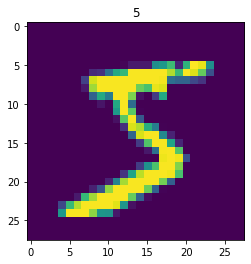

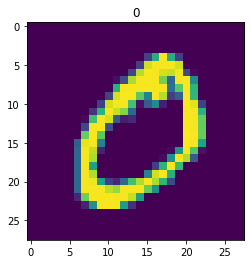

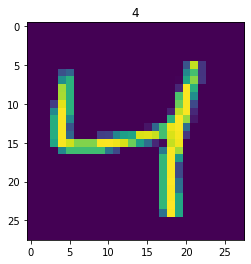

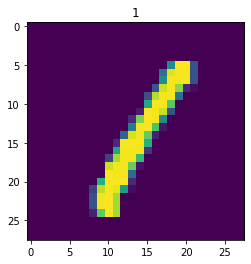

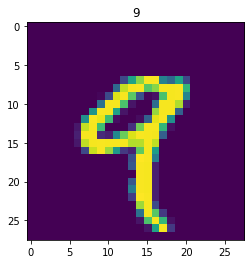

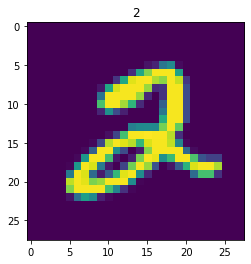

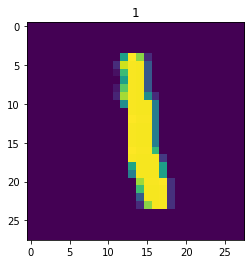

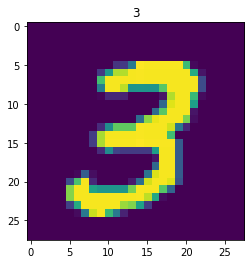

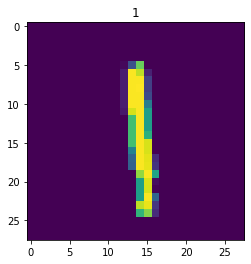

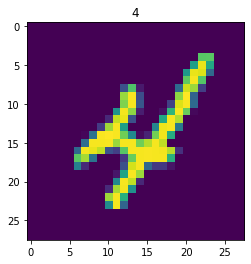

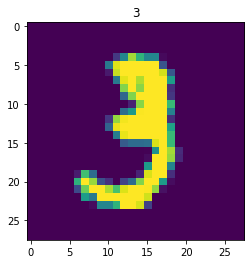

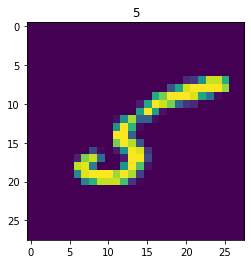

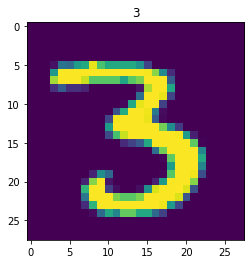

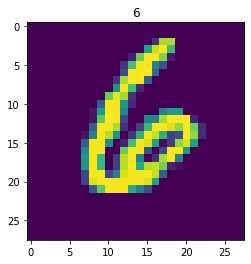

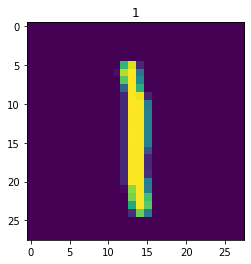

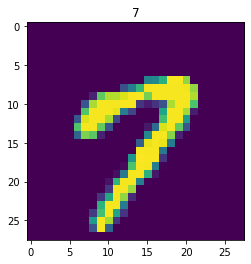

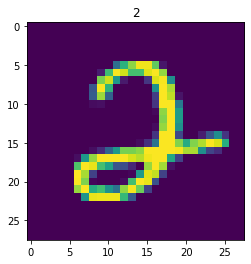

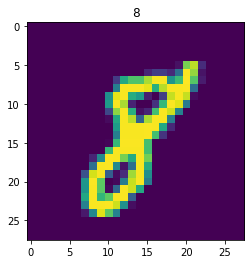

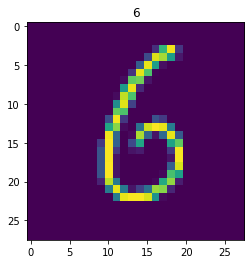

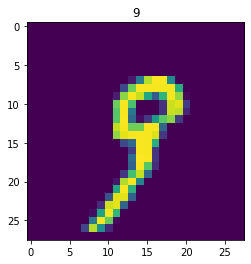

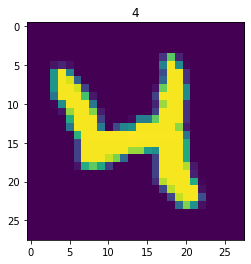

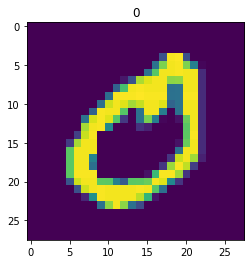

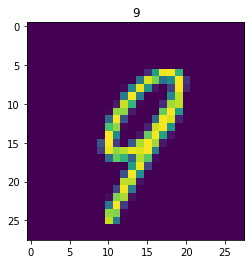

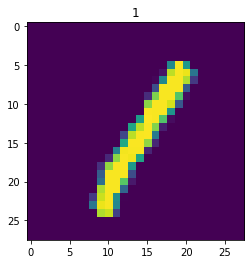

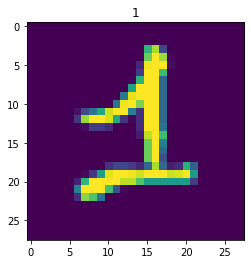

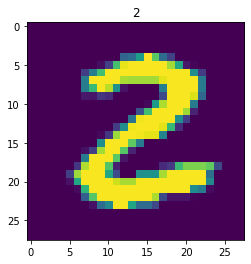

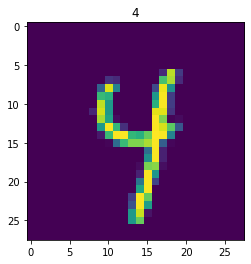

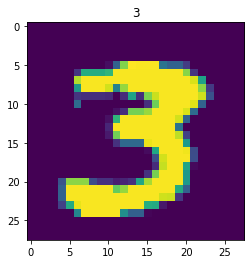

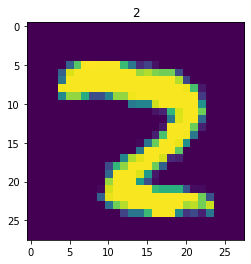

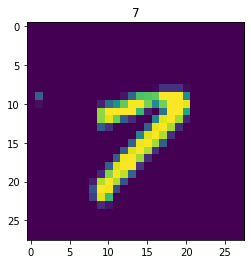

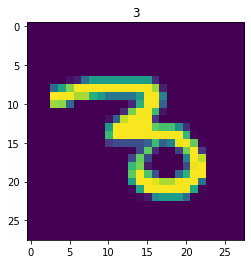

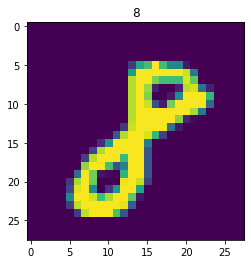

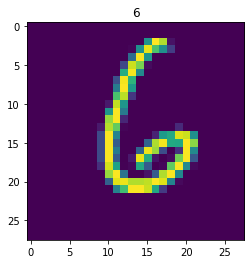

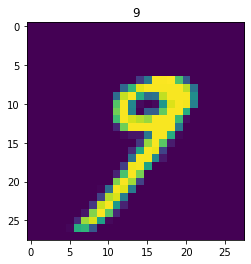

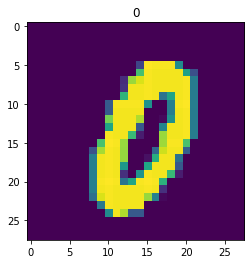

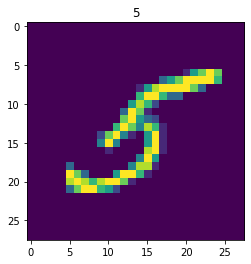

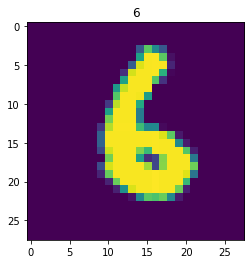

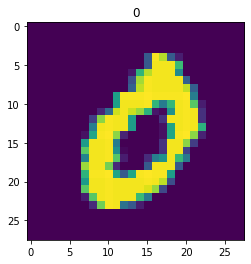

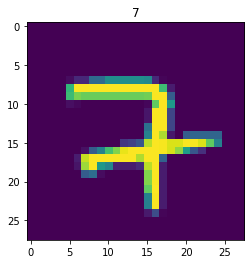

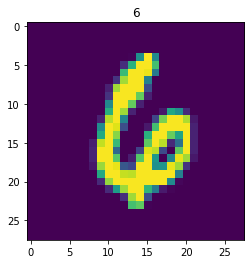

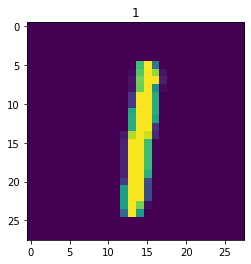

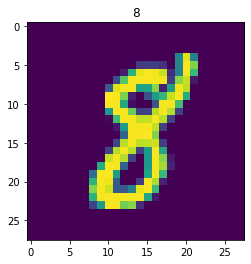

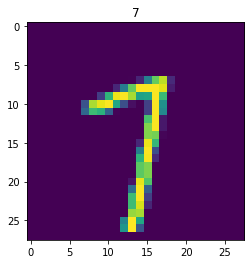

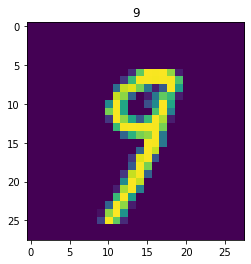

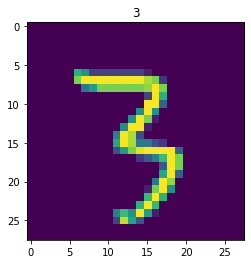

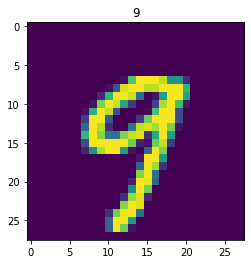

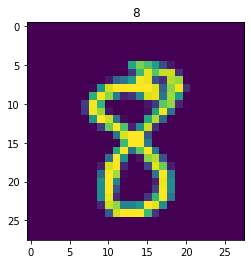

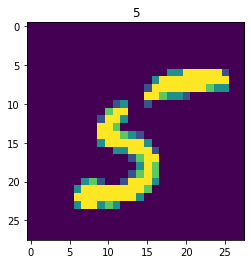

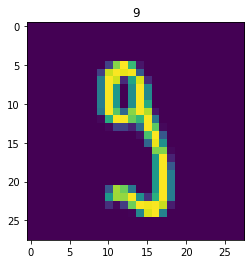

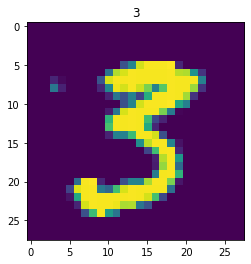

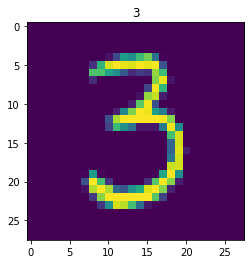

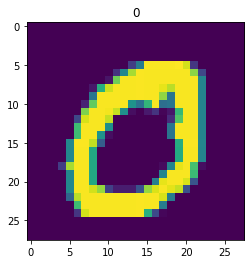

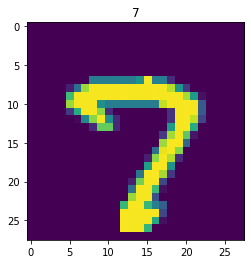

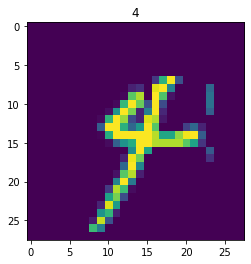

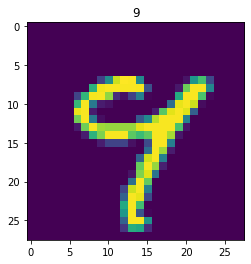

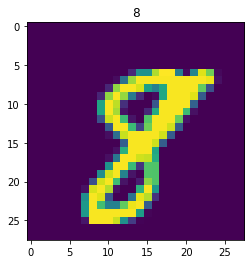

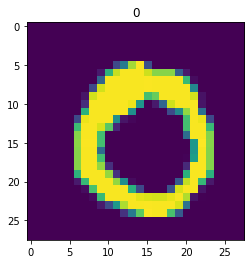

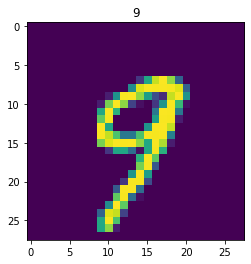

KeyboardInterrupt: 

In [100]:
import matplotlib.pyplot as plt 

(train_data, train_label), (_, _) = tf.keras.datasets.mnist.load_data()
train_data = np.expand_dims(train_data.astype(np.float32) / 255.0, axis=-1)      # [60000, 28, 28, 1]
mnist_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_label))

for image, label in mnist_dataset:
    plt.title(label.numpy())
    plt.imshow(image.numpy()[:, :, 0])
    plt.show()